# Credit Card Default Classification 

__Features:__  
__LIMIT_BAL__: amount of given credit in dollars  
__SEX__: 1 = Male, 2 = Female  
__EDUCATION__: 1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown  
__MARRIAGE__: 1 = Married, 2 = Single, 3 = others  
__AGE__: in years  

__PAY_0__: repayment status in September, 2005.   
__PAY_2__: repayment status in August 2005  
__PAY_3__: repayment status in July 2005  
__PAY_4__: repayment status in JUne 2005  
__PAY_5__: repayment status in May 2005  
__PAY_6__: repayment status in April 2005  
Scale used for the PAY_0-PAY_6: -2 = no consumption(didn't use any money),-1 = pay duly, 0= the use of revolving credit(use money and pay it back over time), 1 = payment delay 1 month, 2 = payment delay for two months, .... 8 = payment delay for eight months, 9 = payment delay for nine months and above    

__BILL_AMT1__: Amount of bill statement in September, 2005   
__BILL_AMT2__: Amount of bill statement in August, 2005   
__BILL_AMT3__: Amount of bill statement in July, 2005   
__BILL_AMT4__: Amount of bill statement in June, 2005   
__BILL_AMT5__: Amount of bill statement in May, 2005  
__BILL_AMT6__: Amount of bill statement in April, 2005   

__PAY_AMT1__: Amount of previous payment in September, 2005   
__PAY_AMT2__: Amount of previous payment in August, 2005   
__PAY_AMT3__: Amount of previous payment in July, 2005  
__PAY_AMT4__: Amount of previous payment in June, 2005  
__PAY_AMT5__: Amount of previous payment in May, 2005  
__PAY_AMT6__: Amount of previous payment in April, 2005  

__Label:__  
__default payment next month__: 1 = yes, 0 = no

<br />

In [1]:
import findspark 
findspark.init()
import pyspark 

In [2]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
conf = pyspark.SparkConf().setAppName('SparkApp').setMaster('local')
sc = pyspark.SparkContext(conf = conf)
spark = SparkSession(sc)

In [3]:
# reading in the csv file 
file_location = 'default_of_credit_card.csv'
file_type = 'csv'

# csv options 
infer_schema = 'true'
delimiter = ','
first_row_is_header = 'true'

df = spark.read.format(file_type).option('infer_schema', infer_schema)\
        .option('header', first_row_is_header).option('sep', delimiter).option('nanValue', ' ').option('nullValue', ' ')\
        .load(file_location)

In [4]:
# seeing the column names
df.columns

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [5]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- LIMIT_BAL: string (nullable = true)
 |-- SEX: string (nullable = true)
 |-- EDUCATION: string (nullable = true)
 |-- MARRIAGE: string (nullable = true)
 |-- AGE: string (nullable = true)
 |-- PAY_0: string (nullable = true)
 |-- PAY_2: string (nullable = true)
 |-- PAY_3: string (nullable = true)
 |-- PAY_4: string (nullable = true)
 |-- PAY_5: string (nullable = true)
 |-- PAY_6: string (nullable = true)
 |-- BILL_AMT1: string (nullable = true)
 |-- BILL_AMT2: string (nullable = true)
 |-- BILL_AMT3: string (nullable = true)
 |-- BILL_AMT4: string (nullable = true)
 |-- BILL_AMT5: string (nullable = true)
 |-- BILL_AMT6: string (nullable = true)
 |-- PAY_AMT1: string (nullable = true)
 |-- PAY_AMT2: string (nullable = true)
 |-- PAY_AMT3: string (nullable = true)
 |-- PAY_AMT4: string (nullable = true)
 |-- PAY_AMT5: string (nullable = true)
 |-- PAY_AMT6: string (nullable = true)
 |-- default payment next month: string (nullable = true)



In [6]:
# removing Id column 
df = df.drop('ID')

# renaming PAY_0 and the class label as default
df = df.withColumnRenamed('PAY_0', 'PAY_1').withColumnRenamed('default payment next month', 'DEFAULT')

In [7]:
# making sure the column names were replaced correctly
df.columns

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'DEFAULT']

In [8]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType

In [9]:
# convert all the string types to integer type
df = df.select(*(col(c).cast(IntegerType()).alias(c) for c in df.columns))

## DATA CLEANING

<br /> 

### Dropping duplicates

In [10]:
# how many values are there before you remove the duplicates 
print('There are %s number of rows before droping the duplicates' %(df.count()))
# checking to see how many duplicates there are 
print('There are %s number of rows before droping the duplicates' %(df.dropDuplicates().count()))
# how many rows would I drop 
print('I would be removing %s rows' %(df.count() - df.dropDuplicates().count()))

There are 30000 number of rows before droping the duplicates
There are 29965 number of rows before droping the duplicates
I would be removing 35 rows


In [11]:
# removing duplicates because there aren't too many of them 
df = df.dropDuplicates()

<br /> 

### Checking for missing values

In [12]:
from pyspark.sql.functions import when, isnan, count

# checking to see if there are any nan or null values in any of the columns 
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+
|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_1|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|DEFAULT|
+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+
|        0|  0|        0|       0|  0|    0|    0|    0|    0|    0|    0|        0|        0|        0|        0|        0|        0|       0|       0|       0|       0|       0|       0|      0|
+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+



### Removing Outliers 

<br /> 

#### AGE 

Checking to make sure there are no negative or 0 values for age. Also make sure the age isn't higher than 100. If the age is younger than 18 remove them because they shouldn't be able to have a credit card yet. 

In [13]:
# viewing the minimum age in the dataset
df.agg({'AGE': 'min'}).show()

+--------+
|min(AGE)|
+--------+
|      21|
+--------+



In [14]:
# viewing the maximum age in the dataset 
df.agg({'AGE': 'max'}).show()

+--------+
|max(AGE)|
+--------+
|      79|
+--------+



<br /> 

#### LIMIT_BAL
Make sure none of the values are 0 or lower

In [15]:
# viewing the lowest limit balance in the dataset
df.agg({'LIMIT_BAL': 'min'}).show()

+--------------+
|min(LIMIT_BAL)|
+--------------+
|         10000|
+--------------+



<br /> 

#### SEX
Make sure there are only 2 values in the dataset. Also instead of 1 representing Males make it 0 and for females change it from 2 to 1

In [16]:
# seeing if sex only hold 2 values
df.select('SEX').distinct().show()

+---+
|SEX|
+---+
|  1|
|  2|
+---+



In [17]:
df.show(1)

+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+
|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_1|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|DEFAULT|
+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+
|   350000|  1|        3|       1| 44|   -1|   -1|   -1|   -1|   -1|   -2|     3265|     2686|     1864|      569|        0|        0|    2686|    1864|     569|       0|       0|       0|      0|
+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+
only showing to

In [18]:
# replace 1 with 0 so men are represented by 0 and make 1 represent female 
df = df.withColumn('SEX', when(df.SEX == 1, 0).otherwise(1))

In [19]:
# checking to see what values the SEX feature holds now 
df.select('SEX').distinct().show()

+---+
|SEX|
+---+
|  1|
|  0|
+---+



In [20]:
# making sure the replace worked correctly
df.show(1)

+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+
|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_1|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|DEFAULT|
+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+
|   350000|  0|        3|       1| 44|   -1|   -1|   -1|   -1|   -1|   -2|     3265|     2686|     1864|      569|        0|        0|    2686|    1864|     569|       0|       0|       0|      0|
+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+
only showing to

<br /> 

#### EDUCATION

In [21]:
# seeing all the unique values in the educations columns
df.select('EDUCATION').sort(col('EDUCATION').asc()).distinct().show()

+---------+
|EDUCATION|
+---------+
|        0|
|        1|
|        2|
|        3|
|        4|
|        5|
|        6|
+---------+



The education column should only contain values 1-6 and including 6. But it shouldn't include 0. 

In [22]:
# checking how many values in the dataframe contain a 0 for EDUCATION 
df.select('EDUCATION').where(col('EDUCATION') == 0).count()

14

In [23]:
# checking to see how much of the original data we will have if we remove these 14 values 
og_len = 30000
print('You will kept',((og_len - (35 + 14))/og_len) * 100, '% of the original data')

You will kept 99.83666666666666 % of the original data


In [24]:
# I am going to remove the 14 values because even after removing the duplicates and after we remove these 14 values we would 
# not have removed more than 1% of the original data 
df = df.filter(col('EDUCATION') != 0)

In [25]:
# making sure we don't have 0 in the education column
df.select('EDUCATION').sort(col('EDUCATION').asc()).distinct().show()

+---------+
|EDUCATION|
+---------+
|        1|
|        2|
|        3|
|        4|
|        5|
|        6|
+---------+



<br /> 

#### MARRIAGE

In [26]:
df.select('MARRIAGE').distinct().show()

+--------+
|MARRIAGE|
+--------+
|       1|
|       3|
|       2|
|       0|
+--------+



In [27]:
# see how many rows have 0 in the marriage column 
df.select('MARRIAGE').filter('MARRIAGE == 0').count()

54

In [28]:
# see how much of the original data I would be getting rid of if I also remove these 54 rows


# current length is the equal to the rows that arent duplicates and that don't contain a 0 for education 
current_len = 29965 - 14


print('The percentage of data you would have kept from the original is %s ' %((current_len - 54)/og_len * 100)) 

The percentage of data you would have kept from the original is 99.65666666666667 


In [29]:
# removing the 54 rows 
df = df.filter('MARRIAGE != 0')

<br /> 

#### PAY_1 - PAY_6

checking to see if any of the columns contain values that aren't inbetween -2 and 9

In [30]:
# how many rows of data are there in the dataframe
df.count()

29897

In [31]:
# importing the required libraries
from pyspark.sql.functions import min, max

In [32]:
# checking the min values
df.select(*(min(column) for column in ['PAY_' + str(i) for i in range(1,7,1)])).show()

+----------+----------+----------+----------+----------+----------+
|min(PAY_1)|min(PAY_2)|min(PAY_3)|min(PAY_4)|min(PAY_5)|min(PAY_6)|
+----------+----------+----------+----------+----------+----------+
|        -2|        -2|        -2|        -2|        -2|        -2|
+----------+----------+----------+----------+----------+----------+



In [33]:
# checking the max values
df.select(*(max(column) for column in ['PAY_' + str(i) for i in range(1,7,1)])).show()

+----------+----------+----------+----------+----------+----------+
|max(PAY_1)|max(PAY_2)|max(PAY_3)|max(PAY_4)|max(PAY_5)|max(PAY_6)|
+----------+----------+----------+----------+----------+----------+
|         8|         8|         8|         8|         8|         8|
+----------+----------+----------+----------+----------+----------+



<br /> 


## EXPLANATORY ANALYSIS 

Since this dataset isn't big data I won't have to take a sample of the data to plot. Also I will first be editing the data to look a certain way so the plots are easier to read/understand before creating the plots 

In [34]:
# importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [35]:
# setting the style of the plots and creating the palette to be used 
sns.set_style("ticks")
palette = ['#222831','#c05555']

In [36]:
# create a function to create the a single plot
def create_plot(df, x,title, xlab, ylab = ' ',hue = 'Defaulted', figsize = (12, 8)):
    # create the figure size
    plt.figure(figsize = figsize)
    
    # create the count plot 
    sns.countplot(data = df, x = x, hue = hue, palette = palette)
    
    # create the title, x label, y label
    plt.title(
        title, # the title to be printed
        fontsize = 20, # increasing the size of the title
        fontweight = 'bold', # making title bold
        y = 1.02 # moving title up
    )
    
    plt.xlabel(
        xlab, # the x label 
        size = 12 # the size of the x label
    )
    
    plt.ylabel(
        ylab # plot the y label
    )
    
    plt.xticks(
        size = 12
    )
    
    plt.yticks(
        size = 12 # increasing the y axis values size 
    )
    
    plt.show()

In [37]:
# function to create subplots 
def create_subplots(df, x, title, row = 6, col = 1, xlab = ' ', ylab = ' ', hue = 'Defaulted', figsize = (15, 8)):
    fig, ax = plt.subplots(row, col, figsize = figsize) # defining how many rows and column are to be created
    for i in range(row):
        xlab = x[i] # make the x label the name of the x that is being plotted
        sns.countplot(data = df, x = x[i], hue = hue, palette = palette, ax = ax[i]) # create the plot
        ax[i].set_xlabel(xlab, size = 12) # creating the x label 
        ax[i].set_ylabel(ylab) # creating the y label
    
    plt.subplots_adjust(bottom = -0.4) # creating some space between the plots
    plt.show()

In [38]:
df.columns

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'DEFAULT']

<br /> 

### DEFAULT

In [39]:
# importing required libraries
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

In [40]:
# converting the data from 0 and 1 to No and Yes
def convert_default(default):
    if default == 0: 
        return 'No'
    else: 
        return 'Yes'

In [41]:
# convert the default column to a int type
df_for_visualization = df.withColumn('DEFAULT', col('DEFAULT').cast(IntegerType()))

# create the udf 
default_udf = udf(convert_default, StringType())

# create a new column in the dataframe that contains a column called defaulted
df_for_visualization = df_for_visualization.withColumn('Defaulted', default_udf('DEFAULT'))

### LIMIT_BAL

In [42]:
# how many unique values are in limit_bal
df_for_visualization.select('LIMIT_BAL').distinct().count()

81

In [43]:
# what is the min value in limit bal
df_for_visualization.agg({'LIMIT_BAL': 'min'}).show()

+--------------+
|min(LIMIT_BAL)|
+--------------+
|         10000|
+--------------+



In [44]:
# what is the min value in limit bal
df_for_visualization.agg({'LIMIT_BAL': 'max'}).show()

+--------------+
|max(LIMIT_BAL)|
+--------------+
|       1000000|
+--------------+



In [45]:
def create_limit_bal_bins(limit_bal):
    if (limit_bal >= 0) & (limit_bal < 100000):
        return '[0 - 100,000)'
    elif (limit_bal >= 100000) & (limit_bal < 200000):
        return '[100,000 - 200,000)'
    elif (limit_bal >= 200000) & (limit_bal < 300000):
        return '[200,000 - 300,000)'
    elif (limit_bal >= 300000) & (limit_bal < 400000):
        return '[300,000 - 400,000)'
    elif (limit_bal >= 400000) & (limit_bal < 500000):
        return '[400,000 - 500,000)'
    elif (limit_bal >= 500000) & (limit_bal < 600000):
        return '[500,000 - 600,000)'
    elif (limit_bal >= 600000) & (limit_bal < 700000):
        return '[600,000 - 700,000)'
    elif (limit_bal >= 700000) & (limit_bal < 800000):
        return '[600,000 - 800,000)'
    elif (limit_bal >= 800000) & (limit_bal < 900000):
        return '[800,000 - 900,000)'
    else:
        return '900,000+'

In [46]:
bucket_udf = udf(create_limit_bal_bins, StringType())
df_for_visualization = df_for_visualization.withColumn('bucketed_limit_bal', bucket_udf('LIMIT_BAL'))

In [47]:
df_for_visualization.select('LIMIT_BAL','bucketed_limit_bal').show(5)

+---------+-------------------+
|LIMIT_BAL| bucketed_limit_bal|
+---------+-------------------+
|   350000|[300,000 - 400,000)|
|   150000|[100,000 - 200,000)|
|    80000|      [0 - 100,000)|
|   230000|[200,000 - 300,000)|
|   440000|[400,000 - 500,000)|
+---------+-------------------+
only showing top 5 rows



<br /> 

### SEX

In [48]:
# function changes 0 to Male and 1 to Female 
def convert_sex(sex):
    if sex == 0: 
        return 'Male'
    else:
        return 'Female'

In [49]:
# create the udf 
sex_udf = udf(convert_sex, StringType())

# create a column in the df_for_visualization that will contain the sex in string form
df_for_visualization = df_for_visualization.withColumn('Sex_string', sex_udf('SEX'))

# show me the first 5 values to see if the column was created and it contains the correct info
df_for_visualization.select('SEX','Sex_string').show(10)

+---+----------+
|SEX|Sex_string|
+---+----------+
|  0|      Male|
|  1|    Female|
|  1|    Female|
|  1|    Female|
|  1|    Female|
|  1|    Female|
|  1|    Female|
|  1|    Female|
|  1|    Female|
|  0|      Male|
+---+----------+
only showing top 10 rows



<br /> 

### EDUCATION

In [50]:
# convert the values from 1,2,3,4,5,6 to what they represents
def convert_education(education):
    if education == 1: 
        return 'Grad School'
    elif education == 2: 
        return 'University'
    elif education == 3: 
        return 'High School'
    elif education == 4: 
        return 'Other'
    elif education == 5: 
        return 'Unknown'
    else:
        return 'Unknown'

In [51]:
# create the udf
education_udf = udf(convert_education, StringType())

# create a column that contains the info of the education status
df_for_visualization = df_for_visualization.withColumn('Education_status', education_udf('EDUCATION'))

In [52]:
df_for_visualization.select('EDUCATION','Education_status').show(5)

+---------+----------------+
|EDUCATION|Education_status|
+---------+----------------+
|        3|     High School|
|        2|      University|
|        2|      University|
|        1|     Grad School|
|        1|     Grad School|
+---------+----------------+
only showing top 5 rows



<br /> 

### MARRIAGE

In [53]:
# convert 1,2,3 to married, single, other 
def convert_marriage(marriage):
    if marriage == 1:
        return 'Married'
    elif marriage == 2:
        return 'Single'
    else:
        return 'Other'

In [54]:
# create the udf 
marriage_udf = udf(convert_marriage, StringType())

# create a column that contained the marriage status as a string 
df_for_visualization = df_for_visualization.withColumn('Marriage_status', marriage_udf('MARRIAGE'))

In [55]:
df_for_visualization.select('MARRIAGE', 'Marriage_status').show(5)

+--------+---------------+
|MARRIAGE|Marriage_status|
+--------+---------------+
|       1|        Married|
|       1|        Married|
|       2|         Single|
|       2|         Single|
|       2|         Single|
+--------+---------------+
only showing top 5 rows



<br /> 

### AGE

In [56]:
# viewing the min and max age
df_for_visualization.select(min('AGE'), max('AGE')).show()

+--------+--------+
|min(AGE)|max(AGE)|
+--------+--------+
|      21|      79|
+--------+--------+



In [57]:
# creating a function that bins the age
def create_age_bin(age):
    if (age > 20) & (age <= 30):
        return '21-30'
    elif (age > 30) & (age <= 40):
        return '31-40'
    elif (age > 40) & (age <= 50):
        return '41-50'
    elif (age > 50) & (age <= 60):
        return '51-60'
    elif (age > 60) & (age <= 70):
        return '61-70'
    elif (age > 70) & (age <= 80):
        return '71-80'

In [58]:
# create the udf 
age_udf = udf(create_age_bin, StringType())

# create a column that contains the age bins
df_for_visualization = df_for_visualization.withColumn('Age_bin', age_udf('AGE'))

In [59]:
df_for_visualization.select('AGE', 'Age_bin').show(5)

+---+-------+
|AGE|Age_bin|
+---+-------+
| 44|  41-50|
| 25|  21-30|
| 43|  41-50|
| 28|  21-30|
| 35|  31-40|
+---+-------+
only showing top 5 rows



<br /> 

### PAY_1 - PAY_6

In [60]:
# convert the values 
def convert_pay(pay):
    result = 'delayed '
    m = ' months'
    if pay == -2:
        return 'No Consumption'
    elif pay == -1:
        return 'Pay duly'
    elif pay == 0:
        return 'Revolving credit'
    elif (pay >= 1) & (pay <=9):
        result += str(pay) + m
        if pay == 9:
            result += ' and above'
        return result

In [61]:
# create the udf
pay_udf = udf(convert_pay, StringType())

# creating a column that contains that conversion of the pay
df_for_visualization = df_for_visualization.withColumn('pay1_status', pay_udf('PAY_1'))
df_for_visualization = df_for_visualization.withColumn('pay2_status', pay_udf('PAY_2'))
df_for_visualization = df_for_visualization.withColumn('pay3_status', pay_udf('PAY_3'))
df_for_visualization = df_for_visualization.withColumn('pay4_status', pay_udf('PAY_4'))
df_for_visualization = df_for_visualization.withColumn('pay5_status', pay_udf('PAY_5'))
df_for_visualization = df_for_visualization.withColumn('pay6_status', pay_udf('PAY_6'))

In [62]:
df_for_visualization.select('pay1_status', 'PAY_1').show(5)

+----------------+-----+
|     pay1_status|PAY_1|
+----------------+-----+
|        Pay duly|   -1|
|        Pay duly|   -1|
|Revolving credit|    0|
|Revolving credit|    0|
|Revolving credit|    0|
+----------------+-----+
only showing top 5 rows



In [63]:
# checking to make sure the values from 1-9 converted correctly 
df_for_visualization.select('pay1_status').filter(col('PAY_1') == 6).show(5,False)

+----------------+
|pay1_status     |
+----------------+
|delayed 6 months|
|delayed 6 months|
|delayed 6 months|
|delayed 6 months|
|delayed 6 months|
+----------------+
only showing top 5 rows



<br /> 

### BILL_AMT1 - BILL_AMT6

In [64]:
# viewing the min
df_for_visualization.select(*(min(column) for column in ['BILL_AMT' + str(i) for i in range(1,7,1)])).show()

+--------------+--------------+--------------+--------------+--------------+--------------+
|min(BILL_AMT1)|min(BILL_AMT2)|min(BILL_AMT3)|min(BILL_AMT4)|min(BILL_AMT5)|min(BILL_AMT6)|
+--------------+--------------+--------------+--------------+--------------+--------------+
|       -165580|        -69777|       -157264|       -170000|        -81334|       -339603|
+--------------+--------------+--------------+--------------+--------------+--------------+



In [65]:
# viewing the max
df_for_visualization.select(*(max(column) for column in ['BILL_AMT' + str(i) for i in range(1,7,1)])).show()

+--------------+--------------+--------------+--------------+--------------+--------------+
|max(BILL_AMT1)|max(BILL_AMT2)|max(BILL_AMT3)|max(BILL_AMT4)|max(BILL_AMT5)|max(BILL_AMT6)|
+--------------+--------------+--------------+--------------+--------------+--------------+
|        964511|        983931|       1664089|        891586|        927171|        961664|
+--------------+--------------+--------------+--------------+--------------+--------------+



In [66]:
def convert_bill_amt(amount):
    if amount < 0: 
        return 'Less Than 0'
    elif (amount >= 0) & (amount < 100000):
        return '[0 - 100,000)'
    elif (amount >= 100000) & (amount < 200000):
        return '[100,000 - 200,000)'
    elif (amount >= 200000) & (amount < 300000):
        return '[200,000 - 300,000)'
    elif (amount >= 300000) & (amount < 400000):
        return '[300,000 - 400,000)'
    elif (amount >= 400000) & (amount < 500000):
        return '[400,000 - 500,000)'
    elif (amount >= 500000) & (amount < 600000):
        return '[500,000 - 600,000)'
    elif (amount >= 600000) & (amount < 700000):
        return '[600,000 - 700,000)'
    elif (amount >= 700000) & (amount < 800000):
        return '[700,000 - 800,000)'
    elif (amount >= 800000) & (amount < 900000):
        return '[800,000 - 900,000)'
    elif (amount >= 900000) & (amount < 1000000):
        return '[900,000 - 1,000,000)'
    else:
        return '1,000,000+'

In [67]:
# create udf 
bill_udf = udf(convert_bill_amt, StringType())

# create the column that will contain this info
df_for_visualization = df_for_visualization.withColumn('bill1_status', bill_udf('BILL_AMT1'))
df_for_visualization = df_for_visualization.withColumn('bill2_status', bill_udf('BILL_AMT2'))
df_for_visualization = df_for_visualization.withColumn('bill3_status', bill_udf('BILL_AMT3'))
df_for_visualization = df_for_visualization.withColumn('bill4_status', bill_udf('BILL_AMT4'))
df_for_visualization = df_for_visualization.withColumn('bill5_status', bill_udf('BILL_AMT5'))
df_for_visualization = df_for_visualization.withColumn('bill6_status', bill_udf('BILL_AMT6'))

In [68]:
df_for_visualization.select('BILL_AMT1', 'bill1_status').show(5)

+---------+-------------------+
|BILL_AMT1|       bill1_status|
+---------+-------------------+
|     3265|      [0 - 100,000)|
|     6156|      [0 - 100,000)|
|    77057|      [0 - 100,000)|
|    30141|      [0 - 100,000)|
|   330759|[300,000 - 400,000)|
+---------+-------------------+
only showing top 5 rows



<br /> 

### PAY_AMT1 - PAY_AMT6

In [69]:
# min values of all the pay_amt
df_for_visualization.select(*(min(column) for column in ['PAY_AMT' + str(i) for i in range(1,7,1)])).show()

+-------------+-------------+-------------+-------------+-------------+-------------+
|min(PAY_AMT1)|min(PAY_AMT2)|min(PAY_AMT3)|min(PAY_AMT4)|min(PAY_AMT5)|min(PAY_AMT6)|
+-------------+-------------+-------------+-------------+-------------+-------------+
|            0|            0|            0|            0|            0|            0|
+-------------+-------------+-------------+-------------+-------------+-------------+



In [70]:
# max values for all the pay_amt
df_for_visualization.select(*(max(column) for column in ['PAY_AMT' + str(i) for i in range(1,7,1)])).show()

+-------------+-------------+-------------+-------------+-------------+-------------+
|max(PAY_AMT1)|max(PAY_AMT2)|max(PAY_AMT3)|max(PAY_AMT4)|max(PAY_AMT5)|max(PAY_AMT6)|
+-------------+-------------+-------------+-------------+-------------+-------------+
|       873552|      1684259|       896040|       621000|       426529|       528666|
+-------------+-------------+-------------+-------------+-------------+-------------+



In [71]:
def convert_pay_amt(amount):
    if (amount >= 0) & (amount < 100000):
        return '[0 - 100,000)'
    elif (amount >= 100000) & (amount < 200000):
        return '[100,000 - 200,000)'
    elif (amount >= 200000) & (amount < 300000):
        return '[200,000 - 300,000)'
    elif (amount >= 300000) & (amount < 400000):
        return '[300,000 - 400,000)'
    elif (amount >= 400000) & (amount < 500000):
        return '[400,000 - 500,000)'
    elif (amount >= 500000) & (amount < 600000):
        return '[500,000 - 600,000)'
    elif (amount >= 600000) & (amount < 700000):
        return '[600,000 - 700,000)'
    elif (amount >= 700000) & (amount < 800000):
        return '[700,000 - 800,000)'
    elif (amount >= 800000) & (amount < 900000):
        return '[800,000 - 900,000)'
    elif (amount >= 900000) & (amount < 1000000):
        return '[900,000 - 1,000,000)'
    else:
        return '1,000,000+'

In [72]:
# create the udf
pay_udf = udf(convert_pay_amt, StringType())

# create the column that contains the info 
df_for_visualization = df_for_visualization.withColumn('pay1_amt_status', pay_udf('PAY_AMT1'))
df_for_visualization = df_for_visualization.withColumn('pay2_amt_status', pay_udf('PAY_AMT2'))
df_for_visualization = df_for_visualization.withColumn('pay3_amt_status', pay_udf('PAY_AMT3'))
df_for_visualization = df_for_visualization.withColumn('pay4_amt_status', pay_udf('PAY_AMT4'))
df_for_visualization = df_for_visualization.withColumn('pay5_amt_status', pay_udf('PAY_AMT5'))
df_for_visualization = df_for_visualization.withColumn('pay6_amt_status', pay_udf('PAY_AMT6'))

In [73]:
df_for_visualization.select('PAY_AMT1', 'pay1_amt_status').show(5)

+--------+-------------------+
|PAY_AMT1|    pay1_amt_status|
+--------+-------------------+
|    2686|      [0 - 100,000)|
|       0|      [0 - 100,000)|
|    3177|      [0 - 100,000)|
|  120093|[100,000 - 200,000)|
|   13100|      [0 - 100,000)|
+--------+-------------------+
only showing top 5 rows



### CREATE PLOTS

In [74]:
## converting pyspark to pandas 
pandas_df = df_for_visualization.toPandas()

<br /> 

#### LIMIT_BAL

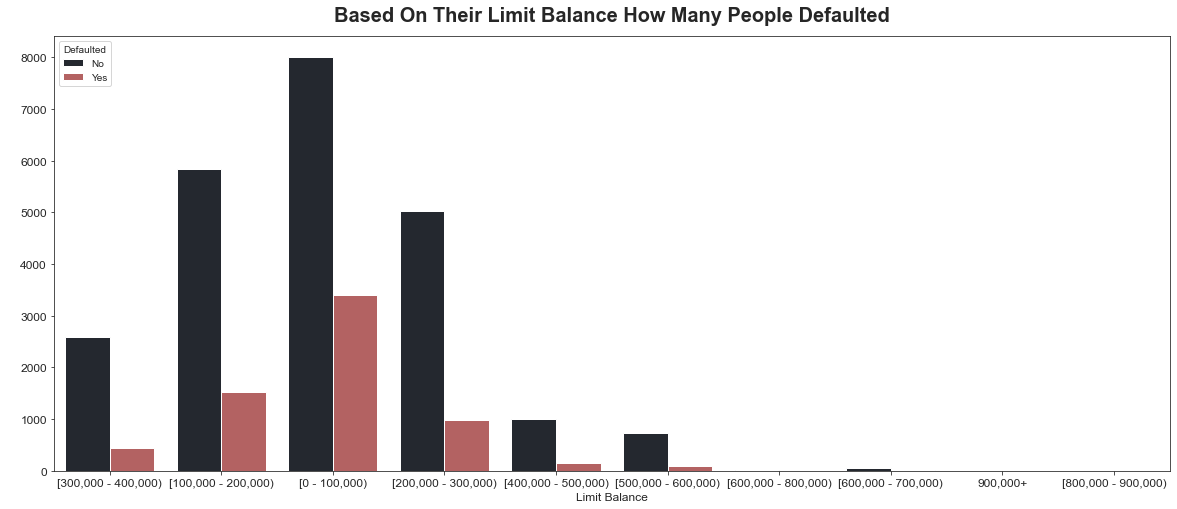

In [75]:
x = 'bucketed_limit_bal'
title = 'Based On Their Limit Balance How Many People Defaulted'
xlab = 'Limit Balance'
create_plot(pandas_df,x, title, xlab, figsize = (20,8))

We can see that most of the people in this dataset fall inbetween 100,000 - 400,000 for their limit balance. Also we can see that most of the people didn't default on their payments which makes sense. 

<br /> 

#### SEX

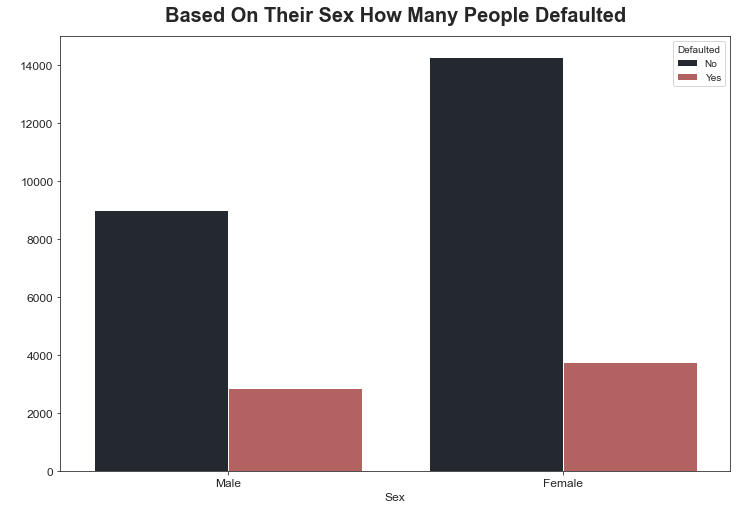

In [76]:
x = 'Sex_string'
title = 'Based On Their Sex How Many People Defaulted'
xlab = 'Sex'
hue = 'Defaulted'
create_plot(pandas_df,x, title, xlab)

We can see that this dataset is made up of more females then male.

<br /> 

#### EDUCATION

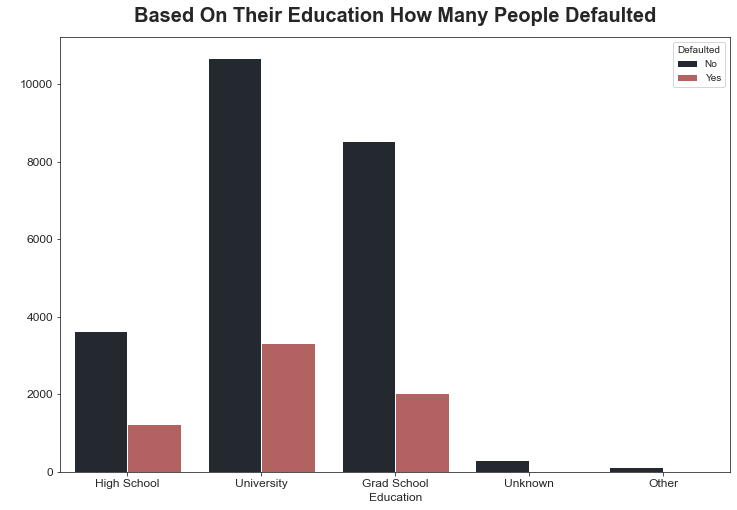

In [77]:
x = 'Education_status'
title = 'Based On Their Education How Many People Defaulted'
xlab = 'Education'
hue = 'Defaulted'
create_plot(pandas_df,x, title, xlab) 

Most of the people in this dataset fall in the high school grad school education level. It seems that most of the people that have a credit card in this dataset have been to a University.

<br />

#### MARRIAGE

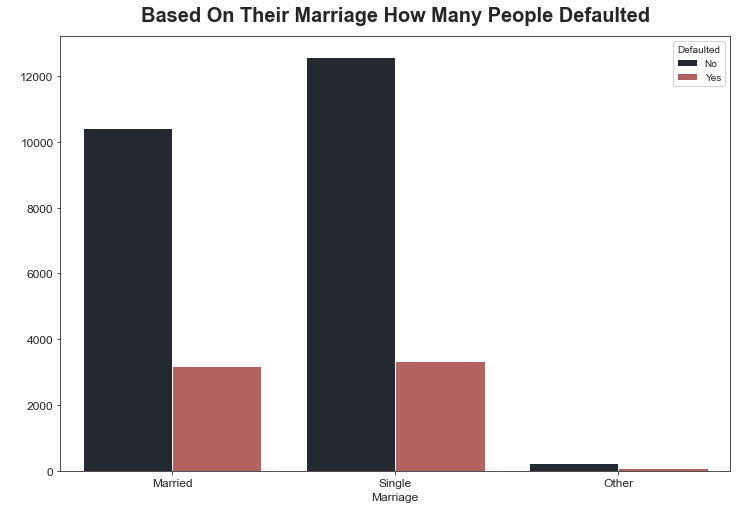

In [78]:
x = 'Marriage_status'
title = 'Based On Their Marriage How Many People Defaulted'
xlab = 'Marriage'
create_plot(pandas_df,x, title, xlab, hue = hue) 

Most of the people in this dataset are either married or single. It also seems that the number of people who defaulted for the marriage and single bins are very close to one another even those their are more single people in this dataset.

<br />

#### AGE

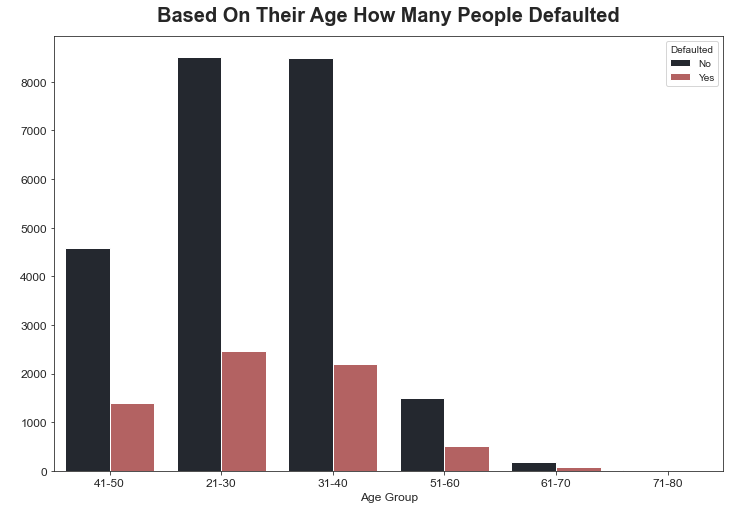

In [79]:
x = 'Age_bin'
title = 'Based On Their Age How Many People Defaulted'
xlab = 'Age Group'
create_plot(pandas_df,x, title, xlab) 

Most of the people in this dataset fall in the age range of 21 till 50. Also it seems like between the 21-30 and 30-40 they have the same number of people who didn't default but 21-30 had more people who did default

<br />

#### PAY_1 - PAY_6

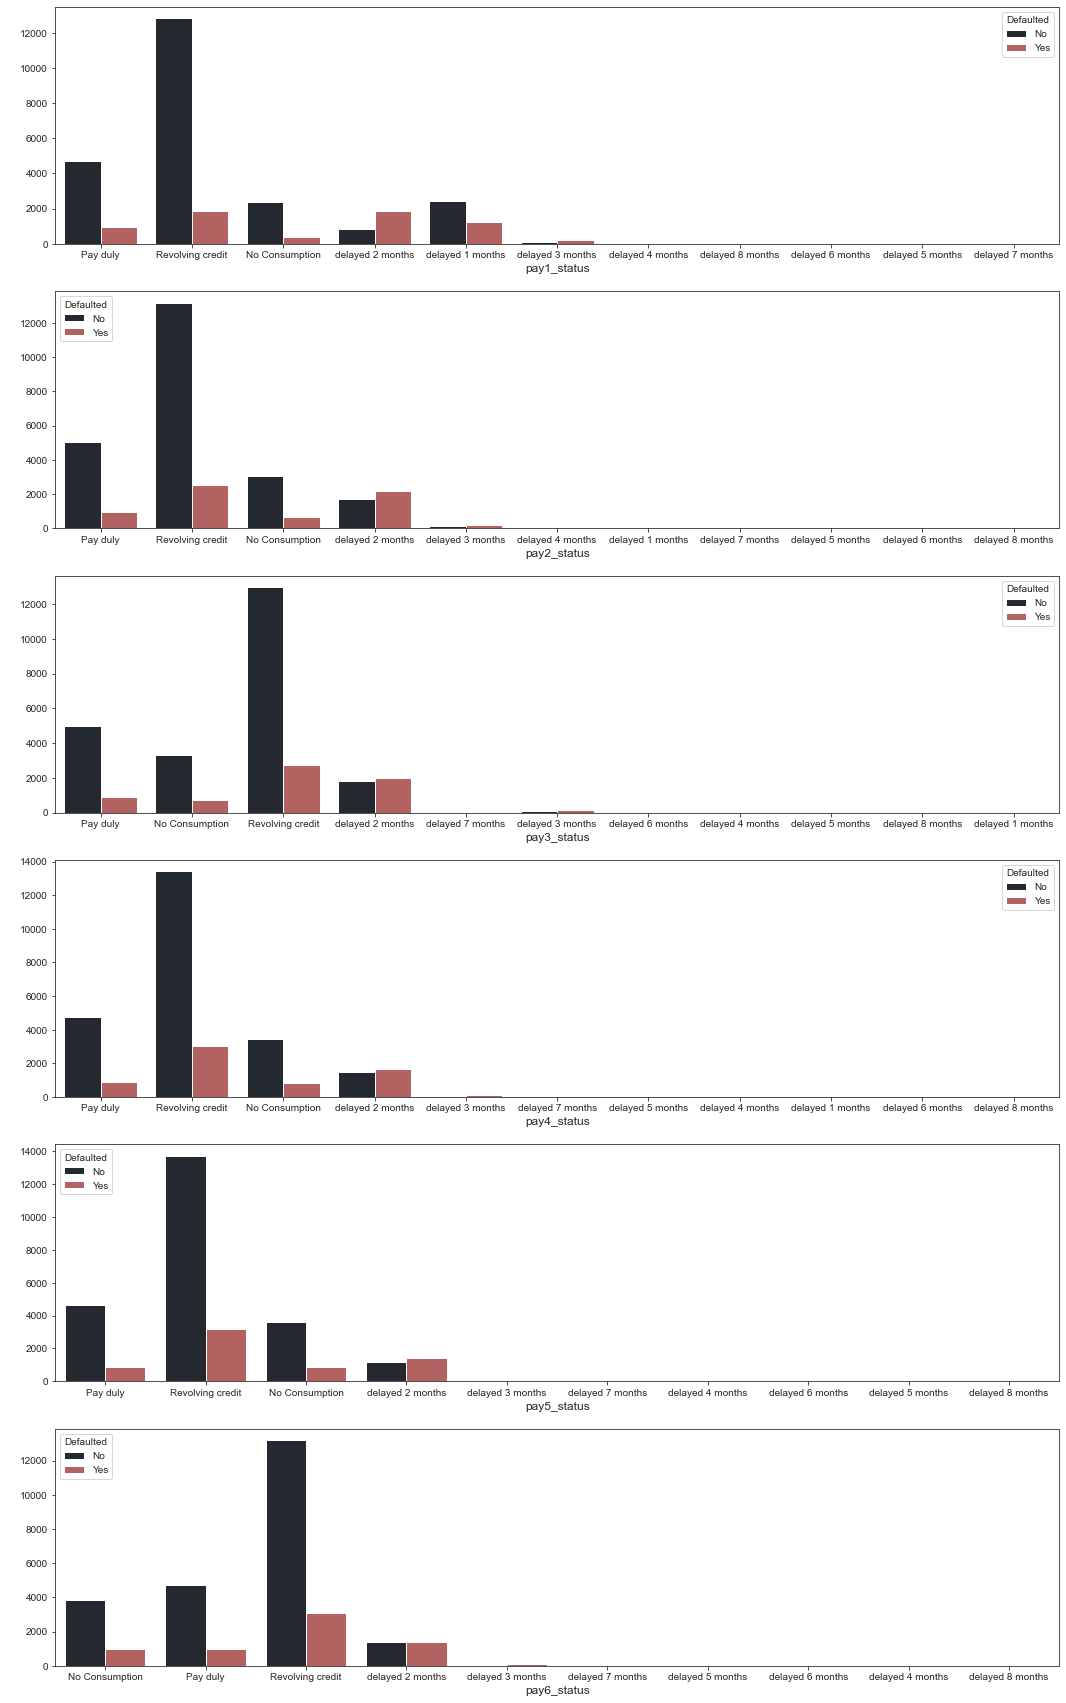

In [80]:
x = ['pay' + str(i)+'_status' for i in range(1,7,1)]
title = 'Based On Their PAY How Many People Defaulted'
create_subplots(pandas_df, x, title, figsize = (18,18))

Most of the people have revolving credit in all of the repayments months. Also most people delay 2 months for their repayment.

<br />

#### BILL_AMT1 - BILL_AMT6

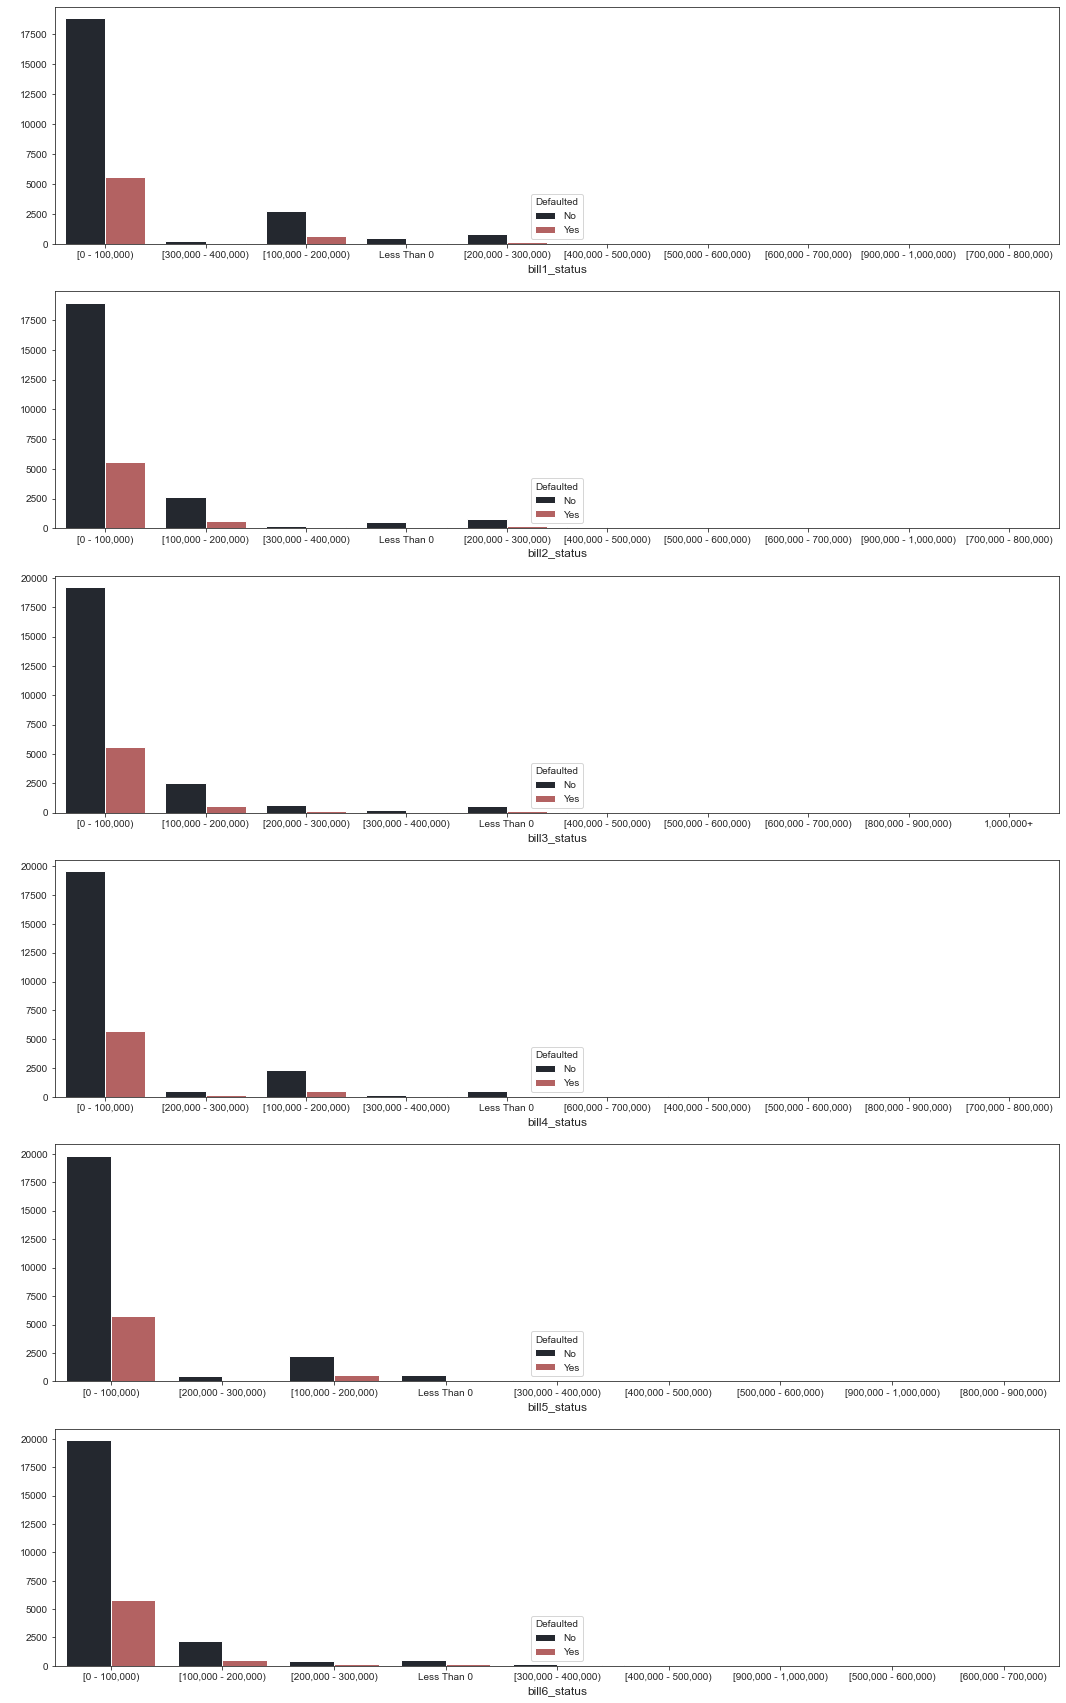

In [81]:
x = ['bill' + str(i)+'_status' for i in range(1,7,1)]
title = 'Based On Their PAY How Many People Defaulted'
create_subplots(pandas_df, x, title, figsize = (18,18))

Most of the bill statements for all of the months fall under 0-100,000 dollars which makes sense. But their are cases where some peoples bill statements are in the 100,000-200,000 dollars area.

<br />

#### PAY_AMT1 - PAY_AMT6

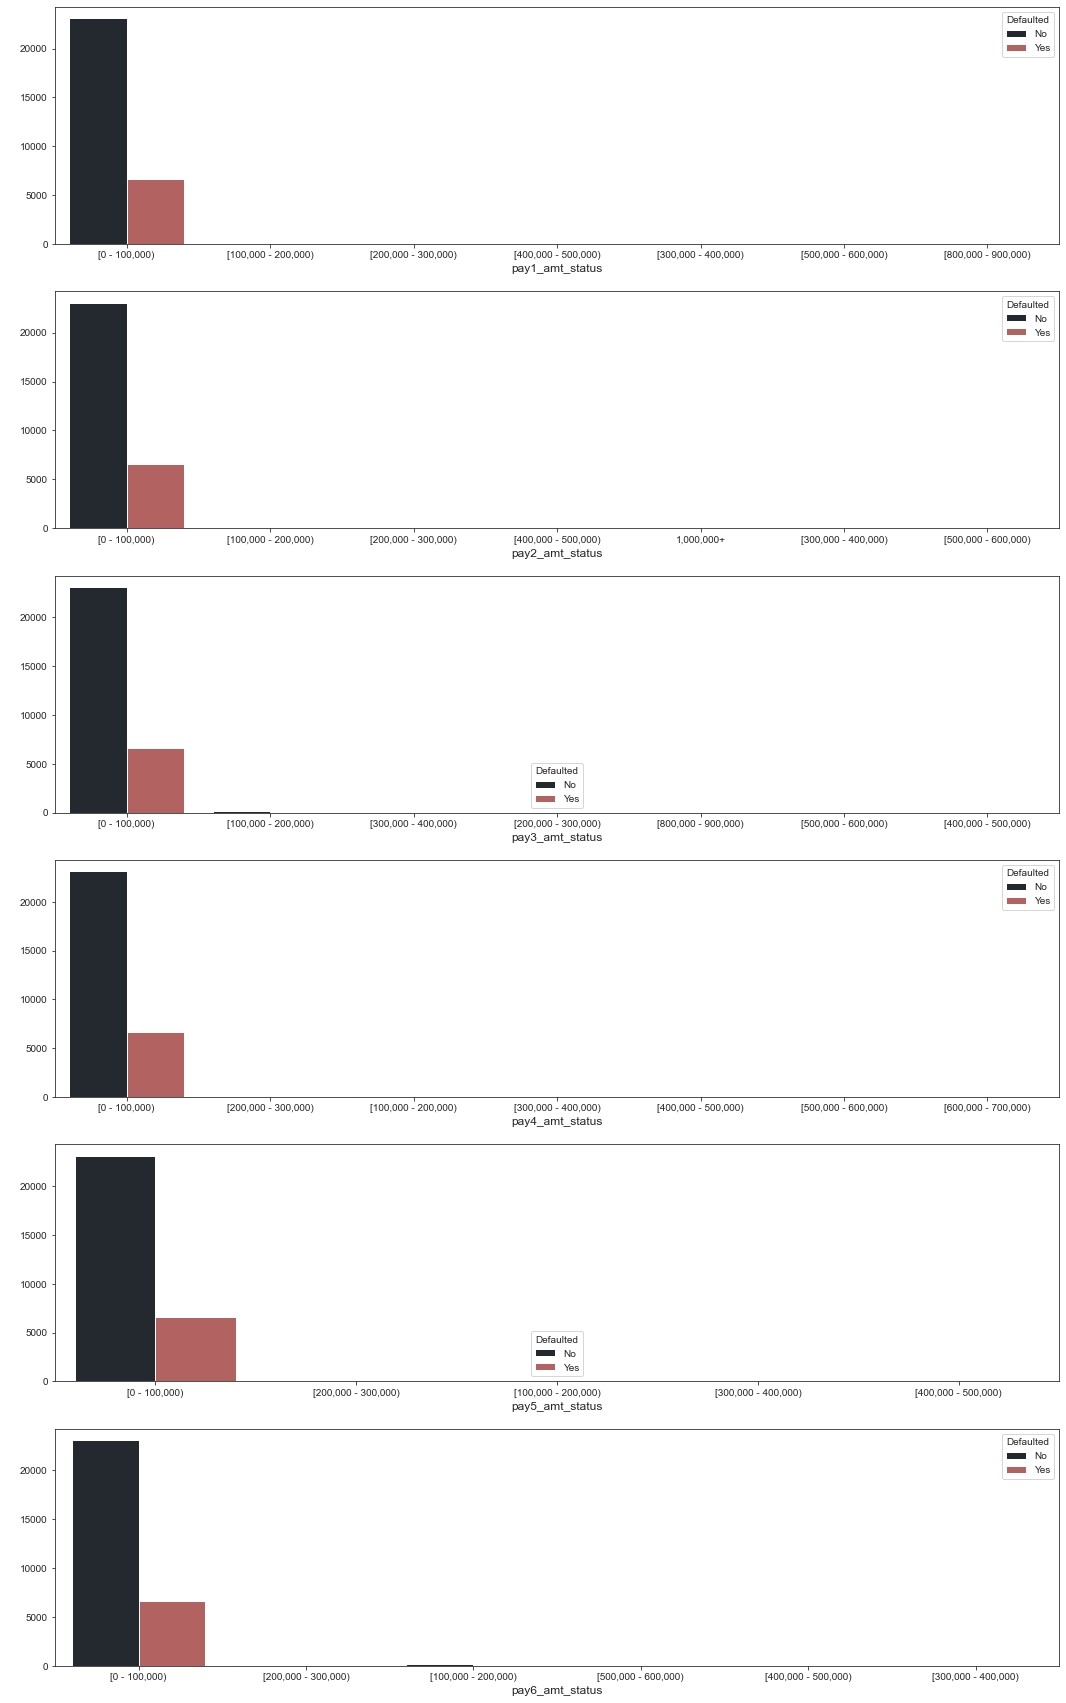

In [82]:
x = ['pay' + str(i)+'_amt_status' for i in range(1,7,1)]
title = 'Based On Their PAY How Many People Defaulted'
create_subplots(pandas_df, x, title, figsize = (18,18))

For almost all the months the previous payment amount falls inbetween 0-100,000 dollars only. But in April, 2005 and July, 2005 some people did have a previous payment amount of 100,000-200,000 dollars

<br /> 


## CLASSIFICATION 

In [83]:
df.printSchema()

root
 |-- LIMIT_BAL: integer (nullable = true)
 |-- SEX: integer (nullable = false)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_1: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: integer (nullable = true)
 |-- BILL_AMT2: integer (nullable = true)
 |-- BILL_AMT3: integer (nullable = true)
 |-- BILL_AMT4: integer (nullable = true)
 |-- BILL_AMT5: integer (nullable = true)
 |-- BILL_AMT6: integer (nullable = true)
 |-- PAY_AMT1: integer (nullable = true)
 |-- PAY_AMT2: integer (nullable = true)
 |-- PAY_AMT3: integer (nullable = true)
 |-- PAY_AMT4: integer (nullable = true)
 |-- PAY_AMT5: integer (nullable = true)
 |-- PAY_AMT6: integer (nullable = true)
 |-- DEFAULT: integer (nullable = true)



In [84]:
# rename the DEFAULT column to label 
df = df.withColumnRenamed('DEFAULT', 'label')

<br /> 

### CREATING TRAINING AND TESTING SET

In [85]:
(train_data, test_data) = df.randomSplit([0.7,0.3], 24)

In [86]:
train_data.count()

20830

In [87]:
test_data.count()

9067

<br /> 

### PIPELINE STAGE 1: VECTOR ASSEMBLER

In [88]:
# importing required library
from pyspark.ml.feature import VectorAssembler

In [89]:
# will hold the stages of the pipeline
stages = []

In [90]:
# creating a features list that only contains the features and not the label
featuresCol = df.columns
featuresCol.remove('label')

In [91]:
featuresCol

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [92]:
# stage 1

# creating the assebler and that features it is going to take in and what column it is going to place the vector inside 
assembler = VectorAssembler(inputCols = featuresCol, outputCol = 'unscaled_features')

# adding it to the stages of the pipeline 
stages += [assembler]

<br /> 

### PIPELINE STAGE 2: SCALING THE DATA

In [93]:
# importing required library
from pyspark.ml.feature import StandardScaler

In [94]:
# stage 2

# creating the scaler and the column it is going to take in and scale and the column the scaled data is going to go inside
scaler = StandardScaler(inputCol = 'unscaled_features', outputCol = 'features')

# adding to the stages of the pipeline
stages += [scaler]

<br /> 

### PIPELINE STAGE 3: MODEL CREATION

In [95]:
# import the required libraries 
from pyspark.ml.classification import LogisticRegression 
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml import Pipeline

In [96]:
def get_sensitivity(predictions):
    tp = predictions.filter(col('prediction') == 1.0).filter(col('prediction') == col('label')).count()
    fn = predictions.filter(col('prediction') == 0.0).filter(col('prediction') != col('label')).count()

    sensitivity = round(((tp/(tp+fn)) * 100), 3)
    
    return sensitivity

In [97]:
def get_specificity(predictions):
    fp = predictions.filter(col('prediction') == 1.0).filter(col('prediction') != col('label')).count()
    tn = predictions.filter(col('prediction') == 0.0).filter(col('prediction') == col('label')).count()
    
    specificity = round(((tn/(tn+fp)) * 100), 3)
    
    return specificity

In [98]:
def get_accuracy(predictions):
    count = predictions.count()
    tp = predictions.filter(col('prediction') == 1.0).filter(col('prediction') == col('label')).count()
    tn = predictions.filter(col('prediction') == 0.0).filter(col('prediction') == col('label')).count()
    
    accuracy = round(((tp + tn)/count) * 100, 3)
    
    return accuracy

#### PIPELINE WITH LOGISTIC REGRESSION

In [99]:
# stage 3 the model 
lr = LogisticRegression(labelCol = 'label', featuresCol = 'features')

stages += [lr]

In [100]:
# creating the pipeline
pipeline = Pipeline().setStages(stages)
# creating the model
models = pipeline.fit(train_data)
# creating the predictions
predictions = models.transform(test_data)

In [101]:
# accuracy, recall values 
accuracy = get_accuracy(predictions)
sensitivity = get_sensitivity(predictions)
specificity = get_specificity(predictions)

print('Accuracy: %s \nSensivity: %s \nSpecificity: %s ' % (accuracy, sensitivity, specificity))

Accuracy: 81.218 
Sensivity: 24.162 
Specificity: 97.055 


#### PIPELINE WITH LOGISTIC REGRESSION HYPERPARAMETER TUNING

In [102]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import numpy as np

In [103]:
# creating a param grid containing different values to see if it improves the sensitivity of the model
param_grid = ParamGridBuilder().addGrid(lr.regParam, np.geomspace(1e-5, 1e5, 20)).build()


# creating an instance of the BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()

In [104]:
# creating the cross validator 
cv = CrossValidator(
    estimator = pipeline, 
    estimatorParamMaps = param_grid, 
    evaluator = evaluator, 
    numFolds = 5
)

In [105]:
model = cv.fit(train_data)

In [106]:
result = model.bestModel.transform(test_data)

In [107]:
# accuracy, recall values 
accuracy = get_accuracy(result)
sensitivity = get_sensitivity(result)
specificity = get_specificity(result)

print('Accuracy: %s \nSensivity: %s \nSpecificity: %s ' % (accuracy, sensitivity, specificity))

Accuracy: 81.229 
Sensivity: 24.162 
Specificity: 97.069 


#### PIPELINE WITH RANDOM FOREST 

In [108]:
from pyspark.ml.classification import RandomForestClassifier

In [109]:
# removing the logistic regression from the stages 
del stages[-1]

In [110]:
stages

[VectorAssembler_e51e4aaad4da, StandardScaler_44b015986c88]

In [111]:
# adding random forest to the pipeline 
rf = RandomForestClassifier(labelCol = 'label', featuresCol = 'features', numTrees = 200) 

stages += [rf] 

In [112]:
# create the pipeline 
pipeline = Pipeline().setStages(stages)
# creating the model
models = pipeline.fit(train_data)
# getting the predictions
predictions = models.transform(test_data)

In [113]:
# accuracy, recall values 
accuracy = get_accuracy(result)
sensitivity = get_sensitivity(result)
specificity = get_specificity(result)

print('Accuracy: %s \nSensivity: %s \nSpecificity: %s ' % (accuracy, sensitivity, specificity))

Accuracy: 81.229 
Sensivity: 24.162 
Specificity: 97.069 


#### PIPELINE WITH RANDOM FOREST HYPERPARAMETER TUNING

In [114]:
import pandas as pd

In [122]:
def best_random_forest(stages, train_data, test_data):
    rf_df = pd.DataFrame() # the dataframe that will contain the results to be returned 
    accuracy = []
    sensitivity = []
    specificity = []
    
    # run 10-200 trees 
    for i in range(10,201,10):
        # delete the last rf 
        del stages[-1]
        
        # adding the randomforest to the stages of the pipeline
        rf = RandomForestClassifier(labelCol = 'label', featuresCol = 'features', numTrees = i)
        stages += [rf]
        
        # creating the pipeline, model, and prdictions 
        pipeline = Pipeline().setStages(stages)
        models = pipeline.fit(train_data)
        predictions = models.transform(test_data)
        
        # get the accuracy, sensitivity, and specificity and then store them in the list
        accuracy.append(get_accuracy(predictions))
        sensitivity.append(get_sensitivity(predictions))
        specificity.append(get_specificity(predictions))
        
    # add the list to a column in the dataframe
    rf_df['Accuracy'] = accuracy
    rf_df['Sensitivity'] = sensitivity
    rf_df['Specificity'] = specificity
    
    # return the dataframe
    return rf_df

In [123]:
rf_df = best_random_forest(stages, train_data, test_data)

In [124]:
# viewing the 10 largest sensitivities that I got from the different pipelines using random forest
rf_df.nlargest(10,'Sensitivity')

,Accuracy,Sensitivity,Specificity
13,81.979,34.416,95.181
17,81.968,34.416,95.167
3,82.012,34.315,95.252
2,81.946,34.264,95.181
8,81.957,34.264,95.195
9,81.912,34.264,95.139
18,81.979,34.213,95.237
11,81.957,34.162,95.223
0,81.879,34.112,95.139
6,82.001,34.112,95.294


In [125]:
# viewing the 10 largest accuracy that I got from the different pipelines using random forest
rf_df.nlargest(10,'Accuracy')

,Accuracy,Sensitivity,Specificity
7,82.034,33.909,95.392
3,82.012,34.315,95.252
6,82.001,34.112,95.294
13,81.979,34.416,95.181
18,81.979,34.213,95.237
17,81.968,34.416,95.167
4,81.957,34.010,95.266
8,81.957,34.264,95.195
11,81.957,34.162,95.223
2,81.946,34.264,95.181


## CONCLUSION 

The best classification technique to use to use: __Random forest with 13 trees__. It not only has a higher sensitivity but also a higher accuracy than the logisitc regression. 